*Name:* Jorge Eduardo Angarita Pérez

*Student Code:* 2248431

In this code, some algorithms from 8.6 section are implemented

First, some libraries are imported.

In [3]:
import numpy as np                          # General numerical data processing
import matplotlib.pyplot as plt             # Plots

### Previous steps:

Function to optimize

In [4]:
def f_obj(x):
    y = (x[0] - 2)**4 + (x[0] - 2*x[1])**2
    return y

Plot the objective function with the analytical minimum for the following range of values:

Text(0, 0.5, '$x_2$')

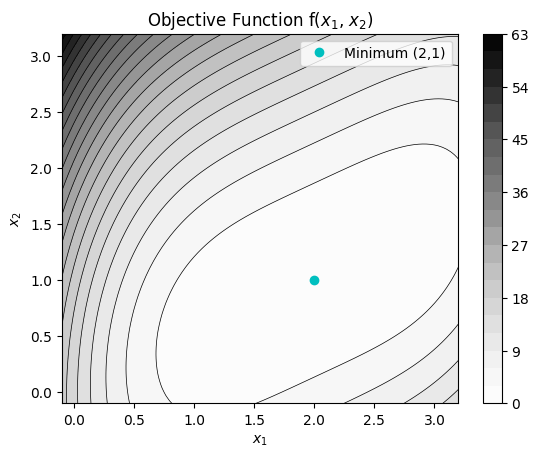

In [5]:
# Grid generation
x = np.linspace(-0.1, 3.2, 100)
y = np.linspace(-0.1, 3.2, 100)
X, Y = np.meshgrid(x, y)

# Function evaluation
Z = f_obj([X, Y])

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Let's continue with some required 1D functions:

In [6]:
# Single-Variable Derivatives

def deriv(f, x, delta):
    y = (f(x + delta) - f(x)) / delta
    return y

def Second_Deriv(f, x, delta):
    y = (f(x + 2*delta) -2*f(x + delta) + f(x)) / delta**2
    return y

# Newton search for 1D

def Newton_Search(f, current, epsilon, delta):
    # Initialization (do While)
    Continue = True
    x = current
    while Continue:
        # First derivative
        deriv_current = deriv(f, x, delta)
        # Second derivative
        deriv2nd_current = Second_Deriv(f, x, delta)
        # Next iteration value
        x_next = x - deriv_current / (deriv2nd_current + delta)
        # Finish flag
        Continue = (abs(x_next - x) > epsilon) & (abs(deriv_current) > epsilon)
        # Update value
        x = x_next
    return x_next

# Multi dimensional to 1-D
def gen_f_1d(f, xi, d):
    def f_1d(l):
        return f(xi + l*d)
    return f_1d


And their analog for multiple variable functions

In [7]:
# Multiple - Variable Derivatives

def Partial_deriv(f, x, index, delta):
    # Derivative usign forward difference equation
    x_delta = x.copy()

    # Increase/Decrease in the required coordinate
    x_delta[index] += delta
    return (f(x_delta) - f(x)) / delta

def Partial_2nd_Deriv(f, x, index, delta):
    x_delta_a  = x.copy()
    x_delta_b  = x.copy()
    x_delta_ab = x.copy()

    # Increase/Decrease in the required coordinate
    x_delta_a[index[0]]  += delta
    x_delta_b[index[1]]  += delta
    x_delta_ab[index[0]] += delta
    x_delta_ab[index[1]] += delta

    return (f(x_delta_ab) - f(x_delta_b) - f(x_delta_a) + f(x)) / (delta ** 2)

def Gradient(f, x, delta):
    grad = x.copy()
    for i in range(len(x)):
        grad[i] = Partial_deriv(f, x, i, delta)
    return grad

def Hessian(f, x, delta):
    n = len(x)
    Hessian = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            Hessian[i,j] = Partial_2nd_Deriv(f, x, [i,j], delta)
    return Hessian

### *8.6 Multidimensional search usign Derivatives*

#### *i) Steepest Gradient Descend*

In [8]:
def St_Gradient(f, x_ini, epsilon, delta):
    # Initial values
    x = np.array(x_ini, dtype=float)

    # Number of iterations
    k = 1
    
    # History of each iterations
    history = [x.copy()]
    
    while True:
        # Increase iterations counter
        k += 1

        # Direction is given by the reflected gradient
        Dir = (-1) * Gradient(f, x, delta)

        # Define a new function for the i-th direction
        f_1d = gen_f_1d(f, x, Dir)

        # Optimize the function on this direction
        l_opt = Newton_Search(f_1d, 0, epsilon, delta) # Initial l value equal to 0, then 

        # Update next "x" value
        x_next = x + l_opt*Dir

        # Save each update
        history.append(x_next.copy())
        
        # Stop criteria
        if(np.linalg.norm(Dir) < epsilon):
            break

        # Update x value
        x = x_next

    print('\nSteepest Gradient Descend:')
    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history

##### **_Testing_**


Steepest Gradient Descend:
Final Value = [2.06469151 1.03239664] 
Iterations = 201


Text(0, 0.5, '$x_2$')

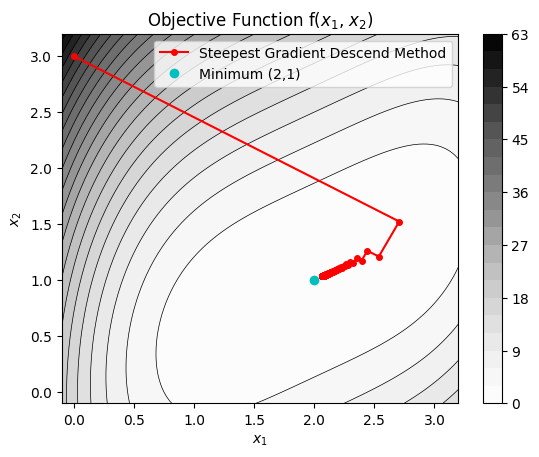

In [14]:
# Parameters for the algorithm
epsilon = 1E-3
delta = epsilon/100

# Run Optimization
x, StGr_History = St_Gradient(f_obj, [0, 3], epsilon, delta)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

StGr_History = np.array(StGr_History)
plt.plot(StGr_History[:, 0], StGr_History[:, 1], 'ro-', markersize=4, 
         label="Steepest Gradient Descend Method")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

#### *ii) Newton Method*

In [11]:
def Newton_Multi(f, x_ini, epsilon, delta):
    # Initial values
    x = np.array(x_ini, dtype=float)

    # Number of iterations
    k = 1
    
    # History of each iterations
    history = [x.copy()]
    
    while True:
        # Gradient at current point
        grad_x = Gradient(f, x, delta)

        # Hessian matrix
        H_x = Hessian(f, x, delta)
        
        # Update next "x" value
        x_next = x - np.dot(np.linalg.inv(H_x), grad_x)

        # Save each update
        history.append(x.copy())
        
        # Stop criteria
        if(np.linalg.norm(grad_x) < epsilon):
            break

        # Update x value
        x = x_next

        # Increase iterations counter
        k += 1

    print('\nNewton Method (Multivariable):')
    print(f'Final Value = {x_next} \nIterations = {k}')

    return x_next, history

##### **_Testing_**


Newton Method (Multivariable):
Final Value = [1.96403097 0.98201048] 
Iterations = 10


Text(0, 0.5, '$x_2$')

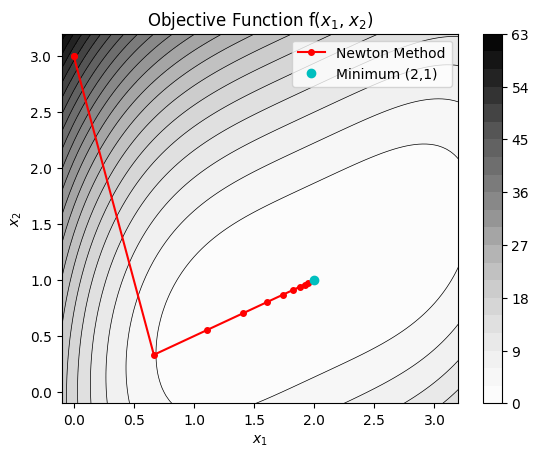

In [15]:
# Parameters for the algorithm
epsilon = 1E-3
delta = epsilon/100

# Run Optimization
x, NwMu_History = Newton_Multi(f_obj, [0, 3], epsilon, delta)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

NwMu_History = np.array(NwMu_History)
plt.plot(NwMu_History[:, 0], NwMu_History[:, 1], 'ro-', markersize=4, 
         label="Newton Method")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')